In [45]:
from robot_agents import VacuumModelInt
from agents import VacuumModel

model = VacuumModel(10, 10, 5, 15, 200)
model.run_model()
model_data = model.datacollector.get_model_vars_dataframe()

Vacuum 2 : Moviendo
Vacuum 1 : Moviendo
Vacuum 0 : Moviendo
Vacuum 3 : Moviendo
Vacuum 4 : Moviendo
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Vacuum 1 : Moviendo
Vacuum 0 : Moviendo
Vacuum 2 : Moviendo
Vacuum 4 : Moviendo
Vacuum 3 : Moviendo
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Vacuum 3 : Moviendo
Vacuum 0 : Moviendo
Vacuum 1 : Moviendo
Vacuum 4 : Moviendo
Vacuum 2 : Moviendo
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Vacuum 1 : Cargando
Vacuum 0 : Moviendo
Vacuum 4 : Moviendo
Vacuum 3 : Moviendo
Vacuum 2 : Moviendo
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Vacuum 0 : Moviendo
Vacuum 4 : Moviendo
Vacuum 1 : Cargando
Vacuum 2 : Moviendo
Vacuum 3 : Moviendo
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Vacuum 1 : Cargando
Vacuum 3 : Moviendo
Vacuum 4 : Moviendo
Vacuum 0 : Moviendo
Vacuum 2 : Cargando
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9,

In [46]:
int_model = VacuumModelInt(10, 10, 5, 15, 200)
int_model.run_model()
int_model_data = int_model.datacollector.get_model_vars_dataframe()

Caja 0 : (5, 2)
Caja 1 : (2, 9)
Caja 2 : (9, 5)
Caja 3 : (2, 6)
Caja 4 : (7, 9)
Caja 5 : (2, 7)
Caja 6 : (8, 3)
Caja 7 : (4, 4)
Caja 8 : (3, 0)
Caja 9 : (3, 1)
Caja 10 : (7, 2)
Caja 11 : (2, 0)
Caja 12 : (8, 8)
Caja 13 : (7, 3)
Caja 14 : (1, 6)
Vacuum 1 : Moviendo , stack: (1, 9) , pos: (1, 7)
Vacuum 4 : Moviendo , stack: (5, 5) , pos: (4, 0)
Vacuum 3 : Moviendo , stack: (9, 9) , pos: (7, 8)
Vacuum 0 : Moviendo , stack: (1, 1) , pos: (0, 3)
Vacuum 2 : Moviendo , stack: (9, 1) , pos: (7, 3)
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Stack (5, 5) : 0
Total boxes in stacks: 0
Vacuum 1 : Cargando , stack: (1, 9) , pos: (1, 6)
Vacuum 4 : Moviendo , stack: (5, 5) , pos: (4, 1)
Vacuum 0 : Moviendo , stack: (1, 1) , pos: (0, 2)
Vacuum 3 : Moviendo , stack: (9, 9) , pos: (7, 8)
Vacuum 2 : Cargando , stack: (9, 1) , pos: (7, 2)
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Stack (5, 5) : 0
Total boxes in stacks: 0
Vacuum 2 : Cargando , stack: (9, 1)

Last step: 201


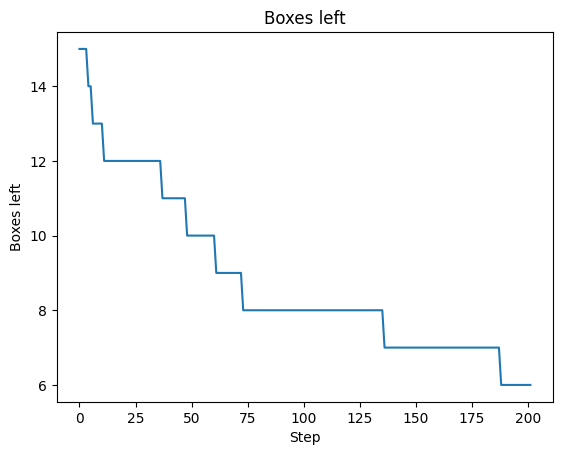

In [47]:
# Boxes left
boxes_left = model_data['boxe cells']
plot = boxes_left.plot(title="Boxes left")
plot.set_xlabel("Step")
plot.set_ylabel("Boxes left")

# Get last step
last_step = model.schedule.steps
print("Last step:", last_step)

Last step: 62


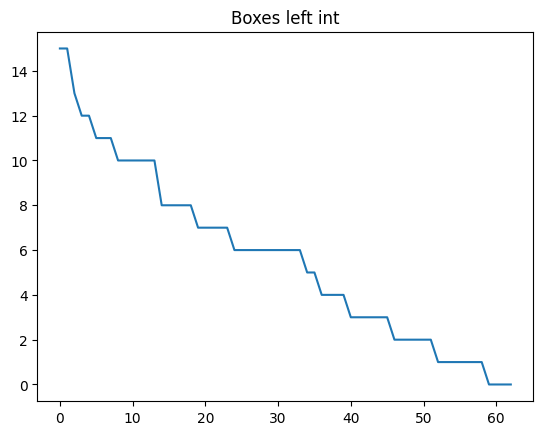

In [48]:
int_boxes_left = int_model_data['boxe cells']
plot = int_boxes_left.plot(title="Boxes left int")

# Get last step
last_step = int_model.schedule.steps
print("Last step:", last_step)


## Batch Runner

In [51]:
import mesa
from robot_agents import VacuumModelInt
from agents import VacuumModel

# Create the model
# Batch run parameters
# VacuumModel(width: int, height: int, N: int, boxeCells: int, max_steps: int = 10
fixed_params = {"width": 10,
                "height": 10,
                "N": 5,
                "boxeCells": range(10, 17),
                "max_steps": 200}

# Save batch run data
batch_run = mesa.batch_run(
    VacuumModel,
    parameters=fixed_params,
    iterations=3,
    # max_steps=200,
    number_processes=2,
    data_collection_period=1,
    display_progress=True
)

100%|██████████| 21/21 [00:00<00:00, 23.62it/s]


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the data
df = pd.DataFrame(batch_run)

In [67]:
# Save batch run data int
batch_run_int = mesa.batch_run(
    VacuumModelInt,
    parameters=fixed_params,
    iterations=3,
    # max_steps=200,
    number_processes=2,
    data_collection_period=1,
    display_progress=True
)

100%|██████████| 21/21 [00:00<00:00, 28.29it/s]


In [68]:
# Get the data
df_int = pd.DataFrame(batch_run_int)

RunId
0     193
1     200
2     200
3     200
4     200
5     200
6     200
7     200
8     147
9     200
10    200
11    200
12    200
13    200
14    186
15    200
16    104
17    200
18    200
19    170
20    200
Name: Step, dtype: int64
[11 12 10 13 14 15 16]
Empty DataFrame
Columns: [RunId, iteration, Step, width, height, N, boxeCells, max_steps, boxe cells, Clean cells, Percent boxe cells, Percent clean cells, Total moves, Vacuum 0, Vacuum 1, Vacuum 2, Vacuum 3, Vacuum 4, AgentID, Cells cleaned, Moves]
Index: []
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


Text(0, 0.5, 'Steps')

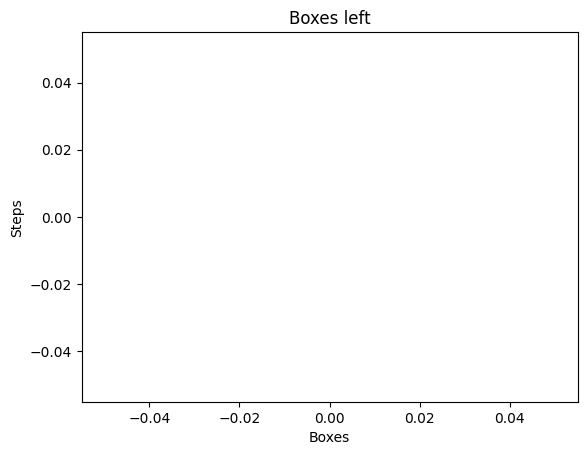

In [70]:
# Get the last step of each run different of 200 or more
last_step = df.groupby("RunId")["Step"].max()
last_step = last_step[last_step <= 200]
print(last_step)

boxes_values = df["boxeCells"].unique()
print(boxes_values)

results_filtered = df[df["RunId"].isin(last_step.values) 
                    & df["boxeCells"].isin(boxes_values)]

print(results_filtered)
boxes_values_plot = results_filtered.boxeCells.keys()
print(boxes_values_plot)
last_step_plot = results_filtered.Step.keys()
print(last_step_plot)

# Plot the results
plt.plot(boxes_values_plot, last_step_plot, "o")
plt.title("Boxes left")
plt.xlabel("Boxes")
plt.ylabel("Steps")